In [1]:
import fitsio
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table,unique,join
import healpy as hp

In [2]:
dirz = '/global/cfs/cdirs/desi/survey/catalogs/SV1/redshift_comps/daily/v1/ELG'
fa = Table.read(dirz+'/alltiles_ELGzinfo.fits')

In [3]:
pixfn      = '/global/cfs/cdirs/desi/target/catalogs/dr9/0.50.0/pixweight/main/resolve/dark/pixweight-1-dark.fits'
hdr        = fitsio.read_header(pixfn,ext=1)
nside,nest = hdr['HPXNSIDE'],hdr['HPXNEST']
print(nside,nest)

256 True


In [4]:
def radec2thphi(ra,dec):
    return (-dec+90.)*np.pi/180.,ra*np.pi/180.
    
def thphi2radec(theta,phi):
    return 180./np.pi*phi,-(180./np.pi*theta-90)

In [5]:
th,phi =radec2thphi(fa['TARGET_RA'],fa['TARGET_DEC'])
hpx = hp.ang2pix(nside,th,phi,nest=nest)

In [6]:
fp = fitsio.read(pixfn)

In [7]:
dg = np.zeros(len(fa))
for i in range(0,len(dg)):
    dg[i] = fp['GALDEPTH_G'][hpx[i]]

In [12]:
fa['GALDEPTH_G'] = dg

In [25]:
#select data with good redshifts and enough observing time
rdmin = 1000
wz = fa['FIBERSTATUS'] == 0
wz &= fa['ZWARN'] == 0
wz &= fa['R_DEPTH_EBVAIR'] > rdmin
fz = unique(fa[wz],keys=['TARGETID'])
print(len(fz))

27591


In [26]:
wn = (fz['PHOTSYS'] == 'N')
fzn = fz[wn]
ws = (fz['PHOTSYS'] == 'S')
fzs = fz[ws]
print(len(fzn),len(fzs))

12176 15415


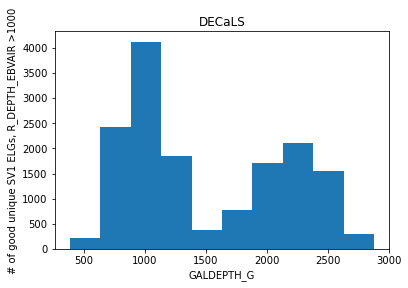

In [27]:
plt.hist(fzs['GALDEPTH_G'])
plt.xlabel('GALDEPTH_G')
plt.ylabel('# of good unique SV1 ELGs, R_DEPTH_EBVAIR >'+str(rdmin))
plt.title('DECaLS')
plt.show()

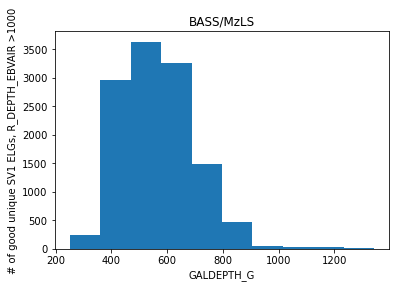

In [28]:
plt.hist(fzn['GALDEPTH_G'])
plt.xlabel('GALDEPTH_G')
plt.ylabel('# of good unique SV1 ELGs, R_DEPTH_EBVAIR >'+str(rdmin))
plt.title('BASS/MzLS')
plt.show()

5462.776000000104 8773


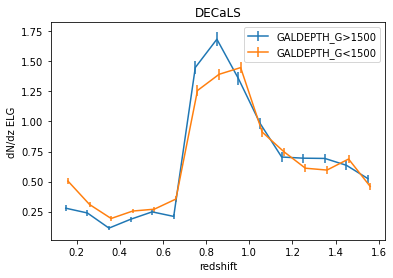

Text(0.5, 1.0, 'DECaLS ELGs, splitting on GALDEPTH_G at 1500')

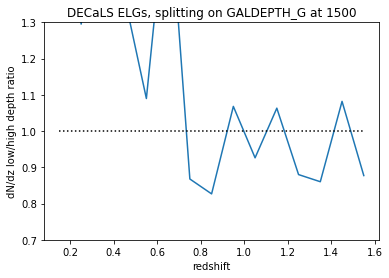

In [29]:
ws = fzs['GALDEPTH_G'] > 1500
print(sum(fzs[ws]['elgqso_weight']),len(fzs[~ws]['elgqso_weight']))
nbin = 15
rng = (0.1,1.6)
bs = (rng[1]-rng[0])/nbin
a = plt.hist(fzs[ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fzs[ws]['elgqso_weight'],label='GALDEPTH_G>1500')
b = plt.hist(fzs[~ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fzs[~ws]['elgqso_weight'],label='GALDEPTH_G<1500')
plt.clf()
zl = a[1][:-1]+0.05
an = a[0]/np.sum(a[0])/bs
bn = b[0]/np.sum(b[0])/bs
plt.errorbar(zl,an,np.sqrt(a[0])/np.sum(a[0])/bs,label='GALDEPTH_G>1500')
plt.errorbar(zl+0.01,bn,np.sqrt(b[0])/np.sum(b[0])/bs,label='GALDEPTH_G<1500')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('dN/dz ELG')
plt.title('DECaLS')
plt.show()
plt.plot(zl,bn/an)
ol = np.ones(len(bn))
plt.plot(zl,ol,':k')
plt.ylim(0.7,1.3)
plt.xlabel('redshift')
plt.ylabel('dN/dz low/high depth ratio')
plt.title('DECaLS ELGs, splitting on GALDEPTH_G at 1500')

4949.171999999986 6132


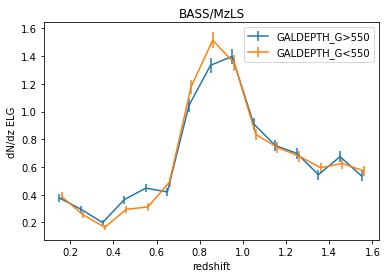

Text(0.5, 1.0, 'BASS/MzLS ELGs, splitting on GALDEPTH_G at 550')

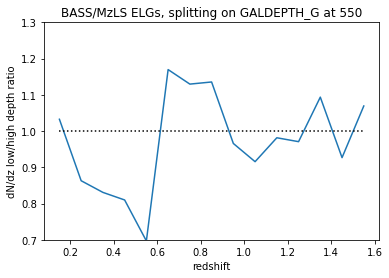

In [30]:
ws = fzn['GALDEPTH_G'] > 550
print(sum(fzn[ws]['elgqso_weight']),len(fzn[~ws]['elgqso_weight']))

nbin = 15
rng = (0.1,1.6)
bs = (rng[1]-rng[0])/nbin
a = plt.hist(fzn[ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fzn[ws]['elgqso_weight'],label='GALDEPTH_G>550')
b = plt.hist(fzn[~ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fzn[~ws]['elgqso_weight'],label='GALDEPTH_G<550')
plt.clf()
zl = a[1][:-1]+0.05
an = a[0]/np.sum(a[0])/bs
bn = b[0]/np.sum(b[0])/bs
plt.errorbar(zl,an,np.sqrt(a[0])/np.sum(a[0])/bs,label='GALDEPTH_G>550')
plt.errorbar(zl+0.01,bn,np.sqrt(b[0])/np.sum(b[0])/bs,label='GALDEPTH_G<550')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('dN/dz ELG')
plt.title('BASS/MzLS')
plt.show()
plt.plot(zl,bn/an)
ol = np.ones(len(bn))
plt.plot(zl,ol,':k')
plt.ylim(0.7,1.3)
plt.xlabel('redshift')
plt.ylabel('dN/dz low/high depth ratio')
plt.title('BASS/MzLS ELGs, splitting on GALDEPTH_G at 550')

In [33]:
from desitarget.sv1 import sv1_targetmask
tarbit2 = sv1_targetmask.desi_mask['ELG_FDR_GFIB']

In [34]:
ws = (fzs['SV1_DESI_TARGET'] & tarbit2) > 0
fzsf = fzs[ws]
print(len(fzsf))
ws = (fzn['SV1_DESI_TARGET'] & tarbit2) > 0
fznf = fzn[ws]
print(len(fznf))

7035
4941


2279.285000000029 4023


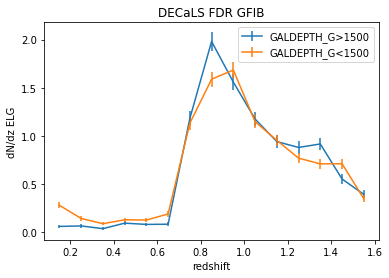

Text(0.5, 1.0, 'DECaLS FDR GIFB ELGs, splitting on GALDEPTH_G at 1500')

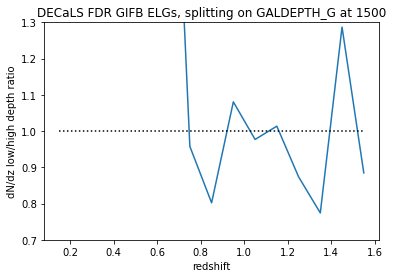

In [37]:
ws = fzsf['GALDEPTH_G'] > 1500
print(sum(fzsf[ws]['elgqso_weight']),len(fzsf[~ws]['elgqso_weight']))
nbin = 15
rng = (0.1,1.6)
bs = (rng[1]-rng[0])/nbin
a = plt.hist(fzsf[ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fzsf[ws]['elgqso_weight'],label='GALDEPTH_G>1500')
b = plt.hist(fzsf[~ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fzsf[~ws]['elgqso_weight'],label='GALDEPTH_G<1500')
plt.clf()
zl = a[1][:-1]+0.05
an = a[0]/np.sum(a[0])/bs
bn = b[0]/np.sum(b[0])/bs
plt.errorbar(zl,an,np.sqrt(a[0])/np.sum(a[0])/bs,label='GALDEPTH_G>1500')
plt.errorbar(zl,bn,np.sqrt(b[0])/np.sum(b[0])/bs,label='GALDEPTH_G<1500')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('dN/dz ELG')
plt.title('DECaLS FDR GFIB')
plt.show()
plt.plot(zl,bn/an)
ol = np.ones(len(bn))
plt.plot(zl,ol,':k')
plt.ylim(0.7,1.3)
plt.xlabel('redshift')
plt.ylabel('dN/dz low/high depth ratio')
plt.title('DECaLS FDR GIFB ELGs, splitting on GALDEPTH_G at 1500')

1657.3309999999963 2614


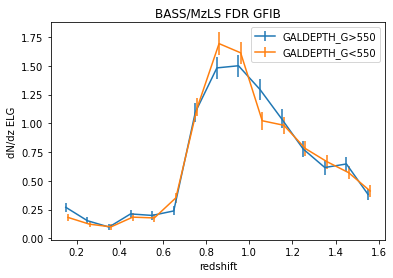

Text(0.5, 1.0, 'BASS/MzLS FDR GFIB ELGs, splitting on GALDEPTH_G at 550')

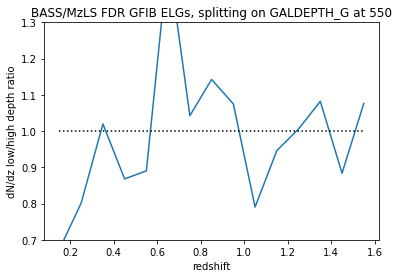

In [38]:
ws = fznf['GALDEPTH_G'] > 550
print(sum(fznf[ws]['elgqso_weight']),len(fznf[~ws]['elgqso_weight']))

nbin = 15
rng = (0.1,1.6)
bs = (rng[1]-rng[0])/nbin
a = plt.hist(fznf[ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fznf[ws]['elgqso_weight'],label='GALDEPTH_G>550')
b = plt.hist(fznf[~ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fznf[~ws]['elgqso_weight'],label='GALDEPTH_G<550')
plt.clf()
zl = a[1][:-1]+0.05
an = a[0]/np.sum(a[0])/bs
bn = b[0]/np.sum(b[0])/bs
plt.errorbar(zl,an,np.sqrt(a[0])/np.sum(a[0])/bs,label='GALDEPTH_G>550')
plt.errorbar(zl+0.01,bn,np.sqrt(b[0])/np.sum(b[0])/bs,label='GALDEPTH_G<550')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('dN/dz ELG')
plt.title('BASS/MzLS FDR GFIB')
plt.show()
plt.plot(zl,bn/an)
ol = np.ones(len(bn))
plt.plot(zl,ol,':k')
plt.ylim(0.7,1.3)
plt.xlabel('redshift')
plt.ylabel('dN/dz low/high depth ratio')
plt.title('BASS/MzLS FDR GFIB ELGs, splitting on GALDEPTH_G at 550')

(array([3200., 5899., 1687.,  812.,  266.,  168.,   70.,   39.,   20.,
          15.]),
 array([0.01284455, 0.04224124, 0.07163793, 0.10103462, 0.13043131,
        0.159828  , 0.18922469, 0.21862139, 0.24801807, 0.27741477,
        0.30681145], dtype=float32),
 <a list of 10 Patch objects>)

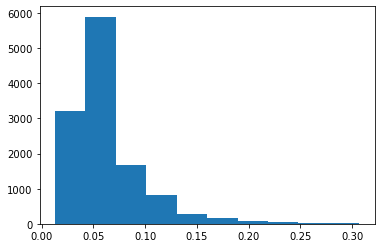

In [39]:
plt.hist(fzn['EBV'])

1210.6930000000016 3141


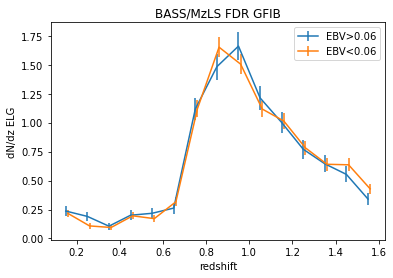

Text(0.5, 1.0, 'BASS/MzLS FDR GFIB ELGs, splitting on EBV at 0.06')

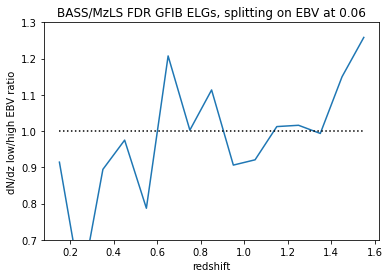

In [42]:
ws = fznf['EBV'] > 0.06
print(sum(fznf[ws]['elgqso_weight']),len(fznf[~ws]['elgqso_weight']))

nbin = 15
rng = (0.1,1.6)
bs = (rng[1]-rng[0])/nbin
a = plt.hist(fznf[ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fznf[ws]['elgqso_weight'],label='EBV>0.06')
b = plt.hist(fznf[~ws]['Z'],histtype='step',bins=nbin,range=rng,weights=fznf[~ws]['elgqso_weight'],label='EBV_G<0.06')
plt.clf()
zl = a[1][:-1]+0.05
an = a[0]/np.sum(a[0])/bs
bn = b[0]/np.sum(b[0])/bs
plt.errorbar(zl,an,np.sqrt(a[0])/np.sum(a[0])/bs,label='EBV>0.06')
plt.errorbar(zl+0.01,bn,np.sqrt(b[0])/np.sum(b[0])/bs,label='EBV<0.06')
plt.legend()
plt.xlabel('redshift')
plt.ylabel('dN/dz ELG')
plt.title('BASS/MzLS FDR GFIB')
plt.show()
plt.plot(zl,bn/an)
ol = np.ones(len(bn))
plt.plot(zl,ol,':k')
plt.ylim(0.7,1.3)
plt.xlabel('redshift')
plt.ylabel('dN/dz low/high EBV ratio')
plt.title('BASS/MzLS FDR GFIB ELGs, splitting on EBV at 0.06')

(array([ 707., 1467., 6732., 4604., 1349.,  362.,  114.,   31.,   29.,
          20.]),
 array([0.00699834, 0.01334277, 0.01968719, 0.02603162, 0.03237605,
        0.03872047, 0.0450649 , 0.05140932, 0.05775375, 0.06409818,
        0.0704426 ], dtype=float32),
 <a list of 10 Patch objects>)

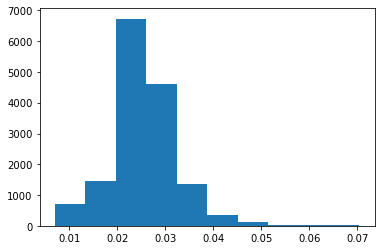

In [43]:
plt.hist(fzs['EBV'])